In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score,f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    path='/home/vedant/projects/'
elif platform == "darwin":
    # OS X
    path='/Users/vedant/Desktop/Programming/'

# labels={0:'clean',1:'high fry',2:'layered',3:'lowfry',4:'midfry',5:'no_vocals'}
labels={0:'clean',1:'scream',2:'no vocal'}

In [2]:
n_class = '3class'

X_train=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_x_train-features_unnormalized.npy',allow_pickle=True)
X_test=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_x_test-features_unnormalized.npy',allow_pickle=True)
X_valid=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_x_valid-features_unnormalized.npy',allow_pickle=True)

y_train_hot=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_y_train-features_unnormalized.npy',allow_pickle=True)
y_test_hot=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_y_test-features_unnormalized.npy',allow_pickle=True)
y_valid_hot=np.load(f'{path}ScreamDetection/FINAL/working_data_final/{n_class}_y_valid-features_unnormalized.npy',allow_pickle=True)

y_train = np.argmax(y_train_hot,axis=1)
y_test = np.argmax(y_test_hot,axis=1)
y_valid = np.argmax(y_valid_hot,axis=1)
#df = pd.DataFrame(d,columns=feature_cols)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [3]:
def classwise_accuracy(cm):
    a=np.zeros(cm.shape)
    for i,x in enumerate(cm):
        a[i]=x/sum(x)
    return a

In [4]:
def eval_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    macro_acc = balanced_accuracy_score(y_test,y_pred)
    classwise_acc = classwise_accuracy(cm)
    return(cm,acc,f1,macro_acc,classwise_acc)

# kNN

Overall Accuracy Score: 0.6693726937269373
Macro Accuracy: 0.6693813236795693
Class-wise accuracy: 
[[0.61342593 0.3587963  0.02777778]
 [0.32842105 0.63578947 0.03578947]
 [0.10267857 0.13839286 0.75892857]]


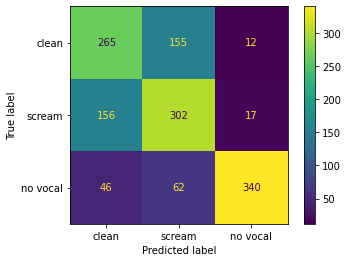

In [5]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,KNN_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# SVM

Overall Accuracy Score: 0.8206642066420664
Macro Accuracy: 0.8204694606887589
F1 Score: 0.8218548977097299
Class-wise accuracy: 
[[0.78009259 0.19675926 0.02314815]
 [0.13263158 0.80631579 0.06105263]
 [0.04241071 0.08258929 0.875     ]]
f1 score: 0.8218548977097299


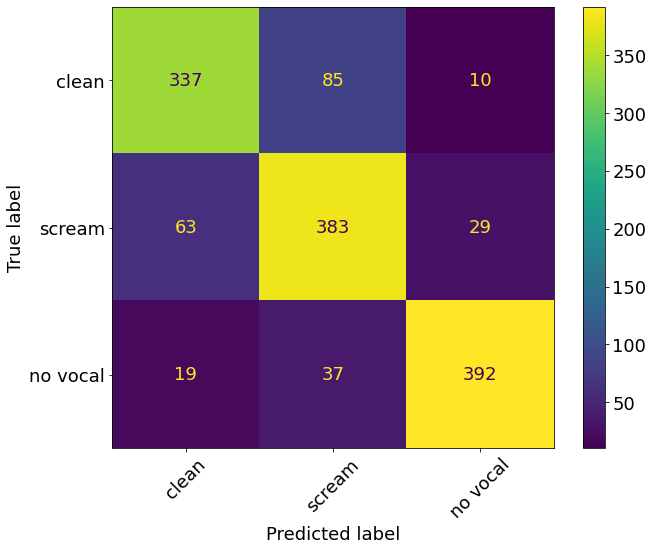

In [8]:
SVM_model = SVC(gamma='scale',C=1.0533, kernel='poly', degree=2,coef0=2.1,random_state=42)
SVM_model.fit(X_train, y_train)

SVM_prediction = SVM_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,SVM_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"F1 Score: {f1}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
# ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l)
disp.plot(xticks_rotation=45)
plt.rcParams.update({'font.size': 18})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.tight_layout()
print(f"f1 score: {f1}")
# plt.savefig('/Users/vedant/Desktop/Programming/ScreamDetection/charts/svm-3class.pdf')

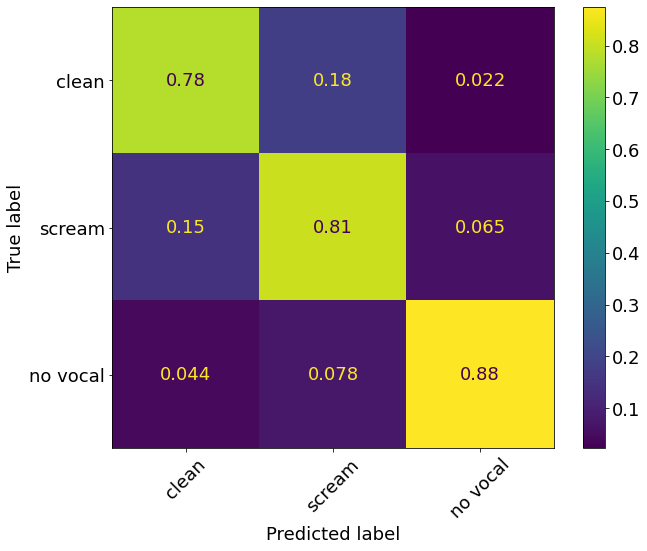

In [11]:
cm_acc = cm/cm.sum(axis=1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_acc,display_labels=l)
disp.plot(xticks_rotation=45)
plt.rcParams.update({'font.size': 18})
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.savefig('/Users/vedant/Desktop/Programming/ScreamDetection/charts/svm-3class-acc.pdf')

# RF

Overall Accuracy Score: 0.7830258302583026
Macro Accuracy: 0.7785645247377704
Class-wise accuracy: 
[[0.56481481 0.42592593 0.00925926]
 [0.08210526 0.87578947 0.04210526]
 [0.03348214 0.07142857 0.89508929]]
f1 score: 0.7795817494649705


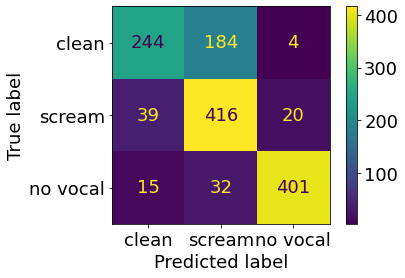

In [13]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,RF_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
print(f"f1 score: {f1}")
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# FCNN

In [8]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler


import plotly.graph_objs as go
from plotly.subplots import make_subplots

import pandas as pd
def train_models(X_train,y_train_hot,X_test,y_test_hot,epochs,batch_size,lr,layer1_nodes,optimiser,loss,verbose,save=False):
    model = Sequential()
    input_shape = (64,1)#(128, 87, 1)
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(6, activation='softmax'))
    model.add(Dense(layer1_nodes,input_dim=64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    if optimiser=='adadelta':
        optim=keras.optimizers.Adadelta(learning_rate=lr)
    if optimiser == 'adam':
        optim=keras.optimizers.Adam(learning_rate=lr)

    if loss == 'crossentropy':
        loss_fn = keras.losses.categorical_crossentropy

    model.compile(loss=loss_fn,
                optimizer=optim,
                metrics=['accuracy'])
    model.build(input_shape)
    model.summary()
    # fit the model
    history=model.fit(X_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose,
            validation_data=(X_test, y_test_hot))
    training_loss=history.history['loss']
    validation_loss=history.history['val_loss']
    training_acc=history.history['accuracy']
    validation_acc=history.history['val_accuracy']
    df=pd.DataFrame()
    df['training_loss'] = training_loss
    df['validation_loss'] = validation_loss
    df['training_acc'] = training_acc
    df['validation_acc'] = validation_acc
    lr_str=str(lr).replace('.','_')
    model_name=f'fcnn_layer1-{layer1_nodes}_batch-{batch_size}_epochs-{epochs}_lr-{lr_str}'
    if save:
        model.save(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}')
        df.to_csv(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}.csv')

    trace1 = go.Scatter(
    x=df.index,
        y=df['training_loss'],
        name='Training Loss'
    )
    trace2 = go.Scatter(
        x=df.index,
        y=df['validation_loss'],
        name='Validation Loss'
    )
    trace3 = go.Scatter(
        x=df.index,
        y=df['training_acc'],
        name='Training Accuracy',
        yaxis='y2'
    )
    trace4 = go.Scatter(
        x=df.index,
        y=df['validation_acc'],
        name='Validation Accuracy',
        yaxis='y2'
    )

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3,secondary_y=True)
    fig.add_trace(trace4,secondary_y=True)
    fig.show()
    return model

In [9]:
# X_train = X_train.reshape(-1, 12)
# X_test = X_test.reshape(-1, 12)
# X_valid = X_valid.reshape(-1, 12)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 34,819
Trainable params: 34,819
Non-trainable params: 0
_________________________________________________________________


Overall Accuracy Score: 0.768
Macro Accuracy: 0.7686320625931214
Class-wise accuracy: 
[[0.64912281 0.30994152 0.04093567]
 [0.16666667 0.80128205 0.03205128]
 [0.04046243 0.10404624 0.85549133]]


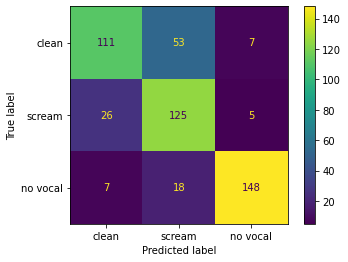

In [10]:
model=train_models(X_train,y_train_hot,X_valid,y_valid_hot,epochs=100,batch_size=1024,lr=0.0001,layer1_nodes=512,optimiser='adam',loss='crossentropy',verbose=0,save=False)
y_pred=model.predict(X_test)
y_pred[np.where(y_pred==np.max(y_pred))] = 1
y_pred=np.argmax(y_pred,axis=1)
cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,y_pred)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()